In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Cargar, limpiar y analizar datos

In [2]:
# Se lee el dataset como csv que fue creado sintéticamente
df = pd.read_csv('../Datasets/dataset.csv')

# Mostramos un resumen del dataset para darnos una idea general de cómo es
df

,id,nombre,semestre,promedio,ingresos,opinion_campus,trabaja,distancia_universidad,edad,tipo_vivienda,horas_estudio,desertor
0,IDHFI3552,Caridad Leonor Padrón Cavazos,7,86,13580.0,10,False,NaN,21,Propia,29,0
1,IDVOH5097,Aurelio Fabiola Anguiano,4,89,15993.0,4,True,1.0,22,Alquiler,5,0
2,IDFYS5079,Omar Amalia Sepúlveda,8,89,11008.0,4,False,1.0,18,Propia,11,0
3,IDSCE4123,Pamela Aida Cuellar Valverde,5,62,30926.0,10,False,1.0,17,Propia,12,0
4,IDYMU9480,Óscar Olivárez Nájera,7,66,24968.0,10,False,1.0,26,Alquiler,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,IDURC8308,Inés Cynthia Madrid Salinas,7,86,17337.0,10,True,1.0,37,Alquiler,70,0
9996,IDJLX9083,Mitzy Puente,10,74,NaN,1,False,10.0,17,Alquiler,88,0
9997,IDNCQ0036,Raquel Longoria,3,91,26994.0,10,True,NaN,27,Propia,71,0
9998,IDWJQ8803,Lic. Andrea Cisneros,10,87,NaN,7,True,3.0,26,Alquiler,74,0


In [3]:
# Pre-processar datos necesarios para el modelo
df = df.dropna()
df["tipo_vivienda_encoded"] = df["tipo_vivienda"].map({"Propia": 1, "Alquiler": 0})
df

C:\Users\tonah\AppData\Local\Temp\ipykernel_17156\863558118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tipo_vivienda_encoded"] = df["tipo_vivienda"].map({"Propia": 1, "Alquiler": 0})


,id,nombre,semestre,promedio,ingresos,opinion_campus,trabaja,distancia_universidad,edad,tipo_vivienda,horas_estudio,desertor,tipo_vivienda_encoded
1,IDVOH5097,Aurelio Fabiola Anguiano,4,89,15993.0,4,True,1.0,22,Alquiler,5,0,0
2,IDFYS5079,Omar Amalia Sepúlveda,8,89,11008.0,4,False,1.0,18,Propia,11,0,1
3,IDSCE4123,Pamela Aida Cuellar Valverde,5,62,30926.0,10,False,1.0,17,Propia,12,0,1
4,IDYMU9480,Óscar Olivárez Nájera,7,66,24968.0,10,False,1.0,26,Alquiler,17,0,0
5,IDRQY3989,Jerónimo Karina Miramontes Gracia,10,68,21569.0,10,True,3.0,23,Alquiler,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,IDLRN1216,Carolina Jonás Altamirano Montero,7,73,8300.0,7,False,1.0,17,Alquiler,89,0,0
9990,IDBDK8140,Ángela Arias,8,75,12127.0,9,True,1.0,17,Propia,78,0,1
9992,IDAIJ0431,Caridad Aurora Riojas,7,69,25630.0,4,True,2.0,25,Propia,97,0,1
9994,IDCWJ0630,Luis Angélica Zamora,5,84,16625.0,9,False,6.0,17,Alquiler,87,1,0


In [4]:
# Esta funcion nos da directamente todos los datos estadísticos del DataFrame, para no sacarlos individualmente, también incluye los cuartiles
df.describe()

,semestre,promedio,ingresos,opinion_campus,distancia_universidad,edad,horas_estudio,desertor,tipo_vivienda_encoded
count,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000
mean,5.510223,79.736369,20277.138476,7.255112,4.271685,20.925960,50.248296,0.190830,0.497831
std,2.898685,11.691870,8048.689231,2.825655,3.652604,3.862762,35.741791,0.392986,0.500034
min,1.000000,60.000000,8300.000000,1.000000,1.000000,17.000000,1.000000,0.000000,0.000000
25%,3.000000,70.000000,14044.750000,5.000000,1.000000,17.000000,16.000000,0.000000,0.000000
50%,6.000000,80.000000,19920.500000,8.000000,3.000000,20.000000,30.000000,0.000000,0.000000
75%,8.000000,90.000000,25786.250000,10.000000,7.000000,24.000000,85.000000,0.000000,1.000000
max,10.000000,100.000000,49329.000000,10.000000,25.000000,39.000000,100.000000,1.000000,1.000000


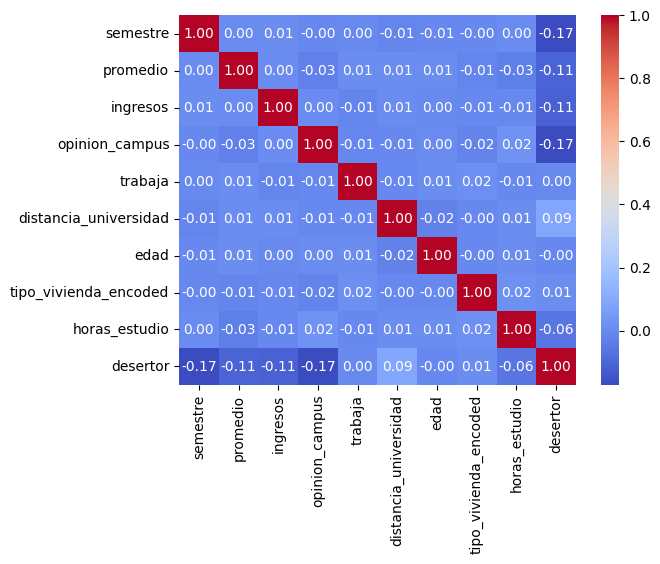

In [6]:
# Graficamos la matriz de corrleación entre las variables
correlation_matrix = df[['semestre', 'promedio', 'ingresos', 'opinion_campus', 'trabaja', 'distancia_universidad', 'edad', 'tipo_vivienda_encoded', 'horas_estudio', 'desertor']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Balancear y separar dataset

In [7]:
df['desertor'].value_counts()

desertor
0    5224
1    1232
Name: count, dtype: int64

In [8]:
# Balanceamos la cantidad de desertores y no desertores
df_desertores = df[df['desertor'] == 1]
df_no_desertores = df[df['desertor'] == 0]

df_no_desertores = df_no_desertores.sample(n=len(df_desertores), random_state=42)
df_balanced = pd.concat([df_desertores, df_no_desertores])

df_balanced['desertor'].value_counts()

desertor
1    1232
0    1232
Name: count, dtype: int64

In [9]:
df_balanced

,id,nombre,semestre,promedio,ingresos,opinion_campus,trabaja,distancia_universidad,edad,tipo_vivienda,horas_estudio,desertor,tipo_vivienda_encoded
10,IDACZ1808,Dr. Espartaco Jasso,4,88,17117.0,5,True,5.0,18,Alquiler,17,1,0
14,IDPLQ7260,Esparta Gaona Mojica,6,67,11396.0,10,False,11.0,17,Alquiler,23,1,0
26,IDLMZ0327,Citlali Rubio Carrillo,10,81,21835.0,1,True,2.0,28,Alquiler,2,1,0
30,IDZOR5918,Luis Manuel Benjamín Corral Escalante,9,61,12617.0,10,False,4.0,17,Alquiler,15,1,0
36,IDBQL4241,Uriel Nadia Salcedo,9,63,15924.0,4,False,1.0,17,Propia,20,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,IDLHK8557,Isabela Arguello,10,94,31891.0,5,False,4.0,22,Alquiler,96,0,0
4356,IDCKO2029,Concepción Figueroa,6,76,8836.0,9,False,1.0,19,Alquiler,5,0,0
3609,IDCQR1959,Juan Villegas Toro,9,71,28096.0,9,False,2.0,24,Propia,24,0,1
59,IDYRJ5314,Ing. Elias Sevilla,10,61,18430.0,8,False,13.0,26,Alquiler,26,0,0


In [10]:
X = df_balanced[['semestre', 'promedio', 'ingresos', 'opinion_campus', 'trabaja', 'distancia_universidad', 'edad', 'tipo_vivienda_encoded', 'horas_estudio']].values.tolist()
y = df_balanced['desertor'].values.tolist()

In [12]:
# Dividimos el dataset en un 80% para entrenamiento y un 20% para testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# df del conjunto de entrenamiento
df_train = pd.DataFrame(X_train)
df_train['target'] = y_train
df_train = df_train.astype(float)
df_train

,0,1,2,3,4,5,6,7,8,target
0,4.0,94.0,8300.0,10.0,0.0,6.0,23.0,0.0,91.0,0.0
1,2.0,99.0,8300.0,5.0,1.0,2.0,17.0,1.0,70.0,1.0
2,5.0,80.0,8300.0,8.0,1.0,11.0,21.0,0.0,76.0,0.0
3,5.0,76.0,10067.0,7.0,1.0,1.0,17.0,0.0,26.0,0.0
4,10.0,86.0,28651.0,4.0,1.0,6.0,18.0,0.0,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1966,10.0,79.0,16332.0,10.0,0.0,13.0,28.0,1.0,78.0,0.0
1967,6.0,66.0,27452.0,10.0,1.0,1.0,25.0,1.0,86.0,1.0
1968,6.0,78.0,8300.0,3.0,1.0,5.0,21.0,0.0,95.0,1.0
1969,1.0,81.0,17860.0,2.0,0.0,5.0,21.0,1.0,19.0,0.0


In [33]:
# df del conjunto de entrenamiento
df_test = pd.DataFrame(X_test)
df_test['target'] = y_test
df_test = df_test.astype(float)
df_test

,0,1,2,3,4,5,6,7,8,target
0,8.0,61.0,26362.0,4.0,0.0,14.0,24.0,0.0,11.0,1.0
1,7.0,91.0,22662.0,10.0,0.0,2.0,17.0,1.0,17.0,0.0
2,3.0,66.0,34408.0,7.0,0.0,7.0,17.0,0.0,87.0,1.0
3,9.0,71.0,10171.0,1.0,0.0,17.0,17.0,0.0,13.0,1.0
4,6.0,69.0,25932.0,5.0,0.0,2.0,24.0,1.0,91.0,1.0
...,...,...,...,...,...,...,...,...,...,...
488,4.0,99.0,15617.0,4.0,0.0,10.0,24.0,0.0,100.0,0.0
489,6.0,65.0,29465.0,9.0,0.0,11.0,19.0,0.0,2.0,0.0
490,1.0,69.0,11246.0,10.0,0.0,7.0,19.0,1.0,83.0,0.0
491,2.0,71.0,21378.0,4.0,0.0,1.0,20.0,1.0,3.0,0.0


# Construir Naive Bayes from scratch

In [17]:
# Separar elementos por clase
def split_by_class(df_train):
    separated = {
        0: df_train[df_train['target'] == 0].drop(columns=['target']),  # Clase 0
        1: df_train[df_train['target'] == 1].drop(columns=['target'])   # Clase 1
    }
    return separated

# Calcular las probabilidades de cada clase
def compute_class_priors(df_train):
    class_counts = df_train['target'].value_counts()
    priors = {
        0: class_counts.get(0, 0) / len(df_train),
        1: class_counts.get(1, 0) / len(df_train)
    }
    return priors

# Calcular media y desviación estándar de cada clase
def summarize_dataset(separated):
    epsilon = 1e-9  # To match sklearn's var_smoothing
    summaries = {
        0: list(zip( separated[0].mean(), np.sqrt(separated[0].var(ddof=0)+epsilon) )),  # Clase 0
        1: list(zip( separated[1].mean(), np.sqrt(separated[1].var(ddof=0)+epsilon) ))   # Clase 1
    }
    return summaries

# Entrenar el modelo Naive Bayes
def train_naive_bayes(df_train):
    priors = compute_class_priors(df_train)
    separated = split_by_class(df_train)
    summaries = summarize_dataset(separated)
    return summaries, priors







# Calcular probabilidad
def calculate_class_log_probability(class_summary, prior, sample):
    log_prob = math.log(prior)
    for i, (mean, std) in enumerate(class_summary):
        x = sample[i]
        exponent = (x - mean)**2 / (2 * (std**2))
        log_prob += -0.5 * math.log(2 * math.pi) - math.log(std) - exponent
    return log_prob

# Make predictions
def predict_proba(summaries, priors, sample):
    raw_probabilities = {
        0: math.exp(calculate_class_log_probability(summaries[0], priors[0], sample)),
        1: math.exp(calculate_class_log_probability(summaries[1], priors[1], sample))
    }
    # Normalize to ensure they sum to 1
    total_prob = sum(raw_probabilities.values())
    normalized_probs = {
        0: raw_probabilities[0] / total_prob,
        1: raw_probabilities[1] / total_prob
    }
    return normalized_probs



## Evaluar el modelo

In [18]:
def predict_highest_prob_class(X, predict_function, summaries, priors):
    df = pd.DataFrame(data=X)
    highest_prob_classes = []
    
    for _, row in df.iterrows():
        prob_dict = predict_function(summaries, priors, row)
        # Determine the class with the highest probability
        if prob_dict[0] >= prob_dict[1]:
            highest_class = 0
        else:
            highest_class = 1
        highest_prob_classes.append(highest_class)
    
    return highest_prob_classes

In [19]:
# Train the model
summaries, priors = train_naive_bayes(df_train)

X_train_predictions = predict_highest_prob_class(X_train, predict_proba, summaries, priors)
print(X_train_predictions)
print(y_train)

#Evaluar el modelo
print(classification_report(y_train, X_train_predictions, target_names=['No Desertor', 'Desertor']))
confusion_matrix(y_train, X_train_predictions)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 

array([[664, 315],
       [355, 637]], dtype=int64)

In [20]:
# Train the model
summaries, priors = train_naive_bayes(df_train)

X_test_predictions = predict_highest_prob_class(X_test, predict_proba, summaries, priors)
print(X_test_predictions)
print(y_test)

#Evaluar el modelo
print(classification_report(y_test, X_test_predictions, target_names=['No Desertor', 'Desertor']))
confusion_matrix(y_test, X_test_predictions)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 

array([[190,  63],
       [ 80, 160]], dtype=int64)

# Construir Naive Bayes con moby Dick, así al vide coding, de chill bro

## En vivo, puro vive coding

## Mejorado

In [30]:
import pandas as pd
import numpy as np
from collections import defaultdict
import math

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = defaultdict(dict)
        self.classes = set()
    
    def train(self, df, target_col='target'):
        """
        Train the classifier on a pandas DataFrame
        Args:
            df: pandas DataFrame with features 0-8 and target column
            target_col: name of the target column (default 'target')
        """
        # Get feature columns (assuming they're labeled 0-8)
        feature_cols = [str(i) for i in range(9)] if '0' in df.columns else list(range(9))
        
        # Count classes and features
        class_counts = df[target_col].value_counts().to_dict()
        self.classes = set(class_counts.keys())
        total_samples = len(df)
        
        # Calculate class probabilities (with Laplace smoothing)
        for label, count in class_counts.items():
            self.class_probs[label] = (count + 1) / (total_samples + len(self.classes))
        
        # Calculate feature probabilities for each class and feature value
        for feature in feature_cols:
            for label in self.classes:
                # Get all values for this feature in the current class
                feature_values = df[df[target_col] == label][feature]
                value_counts = feature_values.value_counts().to_dict()
                total_values = len(feature_values)
                unique_values = df[feature].nunique()
                
                # Store probabilities for each feature value (with Laplace smoothing)
                for value, count in value_counts.items():
                    self.feature_probs[(feature, label, value)] = (count + 1) / (total_values + unique_values)
                
                # Store default probability for unseen values
                self.feature_probs[(feature, label, 'default')] = 1 / (total_values + unique_values)
    
    def predict(self, X):
        """
        Predict class for input features
        Args:
            X: pandas DataFrame or dictionary with features 0-8
        Returns:
            Predicted class label
        """
        if isinstance(X, pd.DataFrame):
            # Convert DataFrame row to dictionary
            X = X.iloc[0] if len(X) == 1 else X.to_dict('records')[0]
        
        best_class = None
        max_prob = -float('inf')
        
        for label in self.classes:
            # Start with the class probability
            prob = math.log(self.class_probs[label])
            
            # Add the log probabilities of each feature
            for feature, value in X.items():
                if (feature, label, value) in self.feature_probs:
                    feature_prob = self.feature_probs[(feature, label, value)]
                else:
                    feature_prob = self.feature_probs.get((feature, label, 'default'), 1e-6)
                prob += math.log(feature_prob)
            
            # Keep track of the class with highest probability
            if prob > max_prob:
                max_prob = prob
                best_class = label
        
        return best_class
    
    def predict_proba(self, X):
        """
        Predict class probabilities for input features
        Args:
            X: pandas DataFrame or dictionary with features 0-8
        Returns:
            Dictionary of class probabilities
        """
        if isinstance(X, pd.DataFrame):
            # Convert DataFrame row to dictionary
            X = X.iloc[0] if len(X) == 1 else X.to_dict('records')[0]
        
        class_probs = {}
        total = 0
        
        for label in self.classes:
            # Start with the class probability
            prob = math.log(self.class_probs[label])
            
            # Add the log probabilities of each feature
            for feature, value in X.items():
                if (feature, label, value) in self.feature_probs:
                    feature_prob = self.feature_probs[(feature, label, value)]
                else:
                    feature_prob = self.feature_probs.get((feature, label, 'default'), 1e-6)
                prob += math.log(feature_prob)
            
            # Store the probability (convert back from log space)
            class_probs[label] = math.exp(prob)
            total += class_probs[label]
        
        # Normalize probabilities
        for label in class_probs:
            class_probs[label] /= total
        
        return class_probs

In [34]:
# Example usage with a pandas DataFrame

# 1. Create or load your DataFrame (example with random data)
import pandas as pd
import numpy as np


# 2. Split into train and test
train_df = df_train.copy()
test_df = df_test.copy()

# 3. Create and train the classifier
nb = NaiveBayesClassifier()
nb.train(train_df, target_col='target')

# 6. Evaluate accuracy
correct = 0
for _, row in test_df.iterrows():
    features = row.drop('target')
    prediction = nb.predict(features)
    if prediction == row['target']:
        correct += 1

accuracy = correct / len(test_df)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.70


# Construir Naive Bayes con sklearn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Load your dataset (replace 'your_dataset.csv' with your actual file)
# df = pd.read_csv('your_dataset.csv')
# For demonstration, let's create a sample dataframe
import numpy as np
np.random.seed(42)
data = np.random.randn(1000, 9)  # 1000 samples, 9 features
target = np.random.randint(0, 2, 1000)  # Binary classification
df = pd.DataFrame(data, columns=[str(i) for i in range(9)])
df['target'] = target

# Separate features and target
X = df.drop('target', axis=1)  # Features (columns 0-8)
y = df['target']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features (optional but often recommended for distance-based algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# To use the trained model for new predictions:
# new_data = scaler.transform([[val0, val1, val2, val3, val4, val5, val6, val7, val8]])
# prediction = gnb.predict(new_data)

Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       253
           1       0.72      0.67      0.69       240

    accuracy                           0.71       493
   macro avg       0.71      0.71      0.71       493
weighted avg       0.71      0.71      0.71       493


Confusion Matrix:
[[190  63]
 [ 80 160]]


# Appendix